
* For a random variable `X` and a value `x` in its range, the event `X=x` will also be denoted by just `x` if the random variable is clear from the context.

In [9]:
import csv
import re
import numpy
import matplotlib
from matplotlib import pyplot as plt
import math
import collections

# Spam Filter using Naive Bayes Classifier

You are given a collection of SMS text messages in `sms.csv` as a tab separated CSV file. The first column of this file tells whether the message is a spam or not spam and the second column gives the message. Assume that this dataset is labelled correctly as spam or not spam. We  will use this dataset as the training data to build a spam filter. 

(a) Analyze the dataset and identify top ten spam words and top ten non-spam words  and their frequency counts. Make sure that you first remove articles ("a", "and", "the") and <=4 letter propositions ("for", "off", "in", "from" and so on).  

In [2]:
class Node:
    '''This node is regarding node in a max heap'''
    def __init__(self, priority, word):
        self.priority = priority
        self.word = word

class MinHeap:
    '''This class is regarding max heap'''
    def __init__(self):
        self.arr = []
        self.heap_count = 0
    
    def __insert_helper(self, i):
        if i <= 0:
            return
        parent_index = (i - 1) // 2
        if self.arr[parent_index].priority <= self.arr[i].priority:
            return
        self.arr[parent_index], self.arr[i] = self.arr[i], self.arr[parent_index]
        self.__insert_helper(parent_index)
        return
    
    def insert(self, freq, word):
        temp_node = Node(freq, word)
        self.heap_count += 1
        self.arr.append(temp_node)
        self.__insert_helper(self.heap_count - 1)
        return
    
    def __min_heapify(self, i):
        left_child = 2 * i + 1
        right_child = 2 * i + 2
        min_index = i
        
        if left_child < self.heap_count and self.arr[left_child].priority < self.arr[min_index].priority:
            min_index = left_child
        if right_child < self.heap_count and self.arr[right_child].priority < self.arr[min_index].priority:
            min_index = right_child
        if min_index != i:
            self.arr[min_index], self.arr[i] = self.arr[i], self.arr[min_index]
            self.__min_heapify(min_index)
        return
    
    def removeMin(self):
        if self.heap_count == 0:
            return None
        self.arr[self.heap_count - 1], self.arr[0] = self.arr[0], self.arr[self.heap_count - 1]
        temp_node = self.arr[self.heap_count - 1]
        del self.arr[self.heap_count - 1]
        self.heap_count -= 1
        self.__min_heapify(0)
        return temp_node
    
    def get_min(self):
        return self.arr[0].priority

In [3]:
freq_map = dict()

spam_messages = 0
notspam_messages = 0

spam_words_count = 0
notspam_words_count = 0
total_words_count = 0

total_distinct_words_set = []

with open('sms.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    for lines in csvreader:
        complete_line = ''
        for line in lines:
            complete_line += line.lower()
            
        wanted_line = ''
        # removing special characters
        for char in complete_line:
            if 97 <= ord(char) <= 122:
                wanted_line += char
            else:
                wanted_line += " "
        new_words = wanted_line.split()
        unwanted_words = ['a', 'an', 'the', "for", "is", "of", "on", "off", "in", "at", "from", "with", "by", "to", "into", "upon"]
        decider = new_words[0] # spam or not spam
        
        if decider == "spam":
            spam_messages += 1
        else:
            notspam_messages += 1
            
        for word in new_words[1:]:
            if word in unwanted_words:
                pass
            else:
                if freq_map.get(word, 0) == 0:
                    total_distinct_words_set.append(word)
                    if decider == 'spam':
                        spam_words_count += 1
                        freq_map[word] = [1, 0, 1] # spam count, not spam count, total_count
                    else:
                        notspam_words_count += 1
                        freq_map[word] = [0, 1, 1] # spam count, not spam count
                else:
                    if decider == 'spam':
                        spam_words_count += 1
                        freq_map[word][0] += 1
                    else:
                        notspam_words_count += 1
                        freq_map[word][1] += 1
                    freq_map[word][2] += 1
                total_words_count += 1

data = []
for key in freq_map:
    row = [key, ] + freq_map[key]
    data.append(row)
# print top 10 spam words and top 10 not spam words ???

i = 1
for row in data:
    print(i, ")", 'word = ', row[0], ',', 'spam = ', row[1], 'not-spam', row[2], 'freq = ', row[3])
    i += 1

1 ) word =  go , spam =  30 not-spam 247 freq =  277
2 ) word =  until , spam =  5 not-spam 22 freq =  27
3 ) word =  jurong , spam =  0 not-spam 1 freq =  1
4 ) word =  point , spam =  0 not-spam 12 freq =  12
5 ) word =  crazy , spam =  5 not-spam 9 freq =  14
6 ) word =  available , spam =  3 not-spam 15 freq =  18
7 ) word =  only , spam =  84 not-spam 134 freq =  218
8 ) word =  bugis , spam =  0 not-spam 7 freq =  7
9 ) word =  n , spam =  24 not-spam 134 freq =  158
10 ) word =  great , spam =  11 not-spam 104 freq =  115
11 ) word =  world , spam =  1 not-spam 36 freq =  37
12 ) word =  la , spam =  3 not-spam 7 freq =  10
13 ) word =  e , spam =  14 not-spam 83 freq =  97
14 ) word =  buffet , spam =  0 not-spam 2 freq =  2
15 ) word =  cine , spam =  0 not-spam 7 freq =  7
16 ) word =  there , spam =  15 not-spam 210 freq =  225
17 ) word =  got , spam =  6 not-spam 231 freq =  237
18 ) word =  amore , spam =  0 not-spam 1 freq =  1
19 ) word =  wat , spam =  1 not-spam 106 f

224 ) word =  b , spam =  29 not-spam 75 freq =  104
225 ) word =  england , spam =  9 not-spam 1 freq =  10
226 ) word =  macedonia , spam =  1 not-spam 0 freq =  1
227 ) word =  dont , spam =  8 not-spam 138 freq =  146
228 ) word =  miss , spam =  5 not-spam 72 freq =  77
229 ) word =  goals , spam =  2 not-spam 0 freq =  2
230 ) word =  team , spam =  4 not-spam 3 freq =  7
231 ) word =  news , spam =  10 not-spam 9 freq =  19
232 ) word =  ur , spam =  139 not-spam 243 freq =  382
233 ) word =  national , spam =  22 not-spam 0 freq =  22
234 ) word =  eg , spam =  10 not-spam 0 freq =  10
235 ) word =  try , spam =  7 not-spam 45 freq =  52
236 ) word =  wales , spam =  1 not-spam 2 freq =  3
237 ) word =  scotland , spam =  1 not-spam 2 freq =  3
238 ) word =  poboxox , spam =  1 not-spam 0 freq =  1
239 ) word =  w , spam =  46 not-spam 15 freq =  61
240 ) word =  wq , spam =  14 not-spam 0 freq =  14
241 ) word =  seriously , spam =  0 not-spam 9 freq =  9
242 ) word =  going ,

406 ) word =  inches , spam =  0 not-spam 4 freq =  4
407 ) word =  calls , spam =  17 not-spam 15 freq =  32
408 ) word =  messages , spam =  13 not-spam 12 freq =  25
409 ) word =  missed , spam =  2 not-spam 24 freq =  26
410 ) word =  didn , spam =  0 not-spam 45 freq =  45
411 ) word =  get , spam =  82 not-spam 304 freq =  386
412 ) word =  hep , spam =  0 not-spam 1 freq =  1
413 ) word =  immunisation , spam =  0 not-spam 1 freq =  1
414 ) word =  nigeria , spam =  0 not-spam 8 freq =  8
415 ) word =  fair , spam =  0 not-spam 3 freq =  3
416 ) word =  hopefully , spam =  0 not-spam 5 freq =  5
417 ) word =  tyler , spam =  0 not-spam 6 freq =  6
418 ) word =  could , spam =  6 not-spam 52 freq =  58
419 ) word =  maybe , spam =  2 not-spam 30 freq =  32
420 ) word =  ask , spam =  0 not-spam 89 freq =  89
421 ) word =  bit , spam =  0 not-spam 43 freq =  43
422 ) word =  stubborn , spam =  0 not-spam 1 freq =  1
423 ) word =  hospital , spam =  0 not-spam 10 freq =  10
424 ) w

692 ) word =  them , spam =  2 not-spam 80 freq =  82
693 ) word =  ave , spam =  3 not-spam 5 freq =  8
694 ) word =  ams , spam =  0 not-spam 1 freq =  1
695 ) word =  gone , spam =  0 not-spam 16 freq =  16
696 ) word =  driving , spam =  2 not-spam 20 freq =  22
697 ) word =  test , spam =  0 not-spam 22 freq =  22
698 ) word =  yet , spam =  2 not-spam 47 freq =  49
699 ) word =  mean , spam =  0 not-spam 20 freq =  20
700 ) word =  guess , spam =  5 not-spam 31 freq =  36
701 ) word =  gave , spam =  0 not-spam 9 freq =  9
702 ) word =  boston , spam =  0 not-spam 5 freq =  5
703 ) word =  men , spam =  2 not-spam 7 freq =  9
704 ) word =  changed , spam =  1 not-spam 6 freq =  7
705 ) word =  search , spam =  0 not-spam 14 freq =  14
706 ) word =  location , spam =  0 not-spam 2 freq =  2
707 ) word =  nyc , spam =  0 not-spam 4 freq =  4
708 ) word =  cuz , spam =  0 not-spam 5 freq =  5
709 ) word =  signin , spam =  0 not-spam 1 freq =  1
710 ) word =  page , spam =  1 not-sp

1001 ) word =  bath , spam =  0 not-spam 11 freq =  11
1002 ) word =  carlos , spam =  0 not-spam 17 freq =  17
1003 ) word =  mall , spam =  0 not-spam 3 freq =  3
1004 ) word =  turns , spam =  0 not-spam 6 freq =  6
1005 ) word =  staying , spam =  0 not-spam 9 freq =  9
1006 ) word =  til , spam =  0 not-spam 25 freq =  25
1007 ) word =  smoke , spam =  0 not-spam 18 freq =  18
1008 ) word =  worth , spam =  13 not-spam 4 freq =  17
1009 ) word =  doesnt , spam =  0 not-spam 9 freq =  9
1010 ) word =  log , spam =  6 not-spam 7 freq =  13
1011 ) word =  spoke , spam =  0 not-spam 6 freq =  6
1012 ) word =  maneesha , spam =  0 not-spam 3 freq =  3
1013 ) word =  satisfied , spam =  0 not-spam 3 freq =  3
1014 ) word =  experience , spam =  0 not-spam 7 freq =  7
1015 ) word =  toll , spam =  0 not-spam 3 freq =  3
1016 ) word =  lifted , spam =  0 not-spam 1 freq =  1
1017 ) word =  hopes , spam =  0 not-spam 1 freq =  1
1018 ) word =  offer , spam =  27 not-spam 7 freq =  34
1019 

1332 ) word =  wot , spam =  1 not-spam 25 freq =  26
1333 ) word =  concentration , spam =  0 not-spam 1 freq =  1
1334 ) word =  mind , spam =  2 not-spam 34 freq =  36
1335 ) word =  made , spam =  1 not-spam 30 freq =  31
1336 ) word =  plans , spam =  0 not-spam 11 freq =  11
1337 ) word =  hanks , spam =  0 not-spam 1 freq =  1
1338 ) word =  lotsly , spam =  0 not-spam 1 freq =  1
1339 ) word =  detail , spam =  0 not-spam 1 freq =  1
1340 ) word =  transfer , spam =  0 not-spam 3 freq =  3
1341 ) word =  acc , spam =  0 not-spam 5 freq =  5
1342 ) word =  stay , spam =  3 not-spam 20 freq =  23
1343 ) word =  tough , spam =  0 not-spam 7 freq =  7
1344 ) word =  optimistic , spam =  0 not-spam 1 freq =  1
1345 ) word =  improve , spam =  0 not-spam 2 freq =  2
1346 ) word =  loan , spam =  4 not-spam 5 freq =  9
1347 ) word =  purpose , spam =  4 not-spam 0 freq =  4
1348 ) word =  homeowners , spam =  3 not-spam 0 freq =  3
1349 ) word =  tenants , spam =  4 not-spam 0 freq = 

1669 ) word =  drink , spam =  0 not-spam 18 freq =  18
1670 ) word =  milk , spam =  0 not-spam 4 freq =  4
1671 ) word =  magic , spam =  0 not-spam 1 freq =  1
1672 ) word =  loose , spam =  0 not-spam 2 freq =  2
1673 ) word =  pan , spam =  0 not-spam 2 freq =  2
1674 ) word =  cheap , spam =  4 not-spam 6 freq =  10
1675 ) word =  book , spam =  6 not-spam 17 freq =  23
1676 ) word =  perhaps , spam =  0 not-spam 2 freq =  2
1677 ) word =  silly , spam =  0 not-spam 1 freq =  1
1678 ) word =  likely , spam =  0 not-spam 3 freq =  3
1679 ) word =  o , spam =  12 not-spam 21 freq =  33
1680 ) word =  uv , spam =  0 not-spam 1 freq =  1
1681 ) word =  causes , spam =  0 not-spam 1 freq =  1
1682 ) word =  mutations , spam =  0 not-spam 1 freq =  1
1683 ) word =  sunscreen , spam =  0 not-spam 1 freq =  1
1684 ) word =  essential , spam =  0 not-spam 3 freq =  3
1685 ) word =  thesedays , spam =  0 not-spam 1 freq =  1
1686 ) word =  online , spam =  0 not-spam 23 freq =  23
1687 ) w

1951 ) word =  walls , spam =  0 not-spam 3 freq =  3
1952 ) word =  bunkers , spam =  0 not-spam 1 freq =  1
1953 ) word =  peaceful , spam =  0 not-spam 2 freq =  2
1954 ) word =  high , spam =  3 not-spam 4 freq =  7
1955 ) word =  xxxxxx , spam =  2 not-spam 0 freq =  2
1956 ) word =  posh , spam =  1 not-spam 0 freq =  1
1957 ) word =  birds , spam =  1 not-spam 4 freq =  5
1958 ) word =  chaps , spam =  1 not-spam 0 freq =  1
1959 ) word =  user , spam =  7 not-spam 1 freq =  8
1960 ) word =  trial , spam =  1 not-spam 0 freq =  1
1961 ) word =  prods , spam =  1 not-spam 0 freq =  1
1962 ) word =  cnotspam , spam =  1 not-spam 0 freq =  1
1963 ) word =  pneys , spam =  1 not-spam 0 freq =  1
1964 ) word =  dob , spam =  1 not-spam 0 freq =  1
1965 ) word =  asap , spam =  3 not-spam 5 freq =  8
1966 ) word =  officially , spam =  0 not-spam 2 freq =  2
1967 ) word =  philosophical , spam =  0 not-spam 1 freq =  1
1968 ) word =  hole , spam =  0 not-spam 1 freq =  1
1969 ) word =

2224 ) word =  wrongly , spam =  0 not-spam 1 freq =  1
2225 ) word =  ad , spam =  1 not-spam 5 freq =  6
2226 ) word =  crap , spam =  0 not-spam 2 freq =  2
2227 ) word =  borin , spam =  1 not-spam 1 freq =  2
2228 ) word =  boggy , spam =  0 not-spam 1 freq =  1
2229 ) word =  boring , spam =  0 not-spam 5 freq =  5
2230 ) word =  biatch , spam =  0 not-spam 1 freq =  1
2231 ) word =  nxt , spam =  0 not-spam 7 freq =  7
2232 ) word =  hesitate , spam =  0 not-spam 1 freq =  1
2233 ) word =  weakness , spam =  0 not-spam 1 freq =  1
2234 ) word =  notebook , spam =  0 not-spam 1 freq =  1
2235 ) word =  salary , spam =  0 not-spam 5 freq =  5
2236 ) word =  de , spam =  0 not-spam 24 freq =  24
2237 ) word =  chocolate , spam =  0 not-spam 2 freq =  2
2238 ) word =  alcohol , spam =  0 not-spam 3 freq =  3
2239 ) word =  potential , spam =  1 not-spam 2 freq =  3
2240 ) word =  talent , spam =  0 not-spam 3 freq =  3
2241 ) word =  reckon , spam =  0 not-spam 2 freq =  2
2242 ) wo

2479 ) word =  praises , spam =  0 not-spam 1 freq =  1
2480 ) word =  curry , spam =  0 not-spam 2 freq =  2
2481 ) word =  makiing , spam =  0 not-spam 1 freq =  1
2482 ) word =  sambar , spam =  0 not-spam 1 freq =  1
2483 ) word =  ndship , spam =  0 not-spam 1 freq =  1
2484 ) word =  needle , spam =  0 not-spam 1 freq =  1
2485 ) word =  clock , spam =  0 not-spam 4 freq =  4
2486 ) word =  evn , spam =  0 not-spam 3 freq =  3
2487 ) word =  meetitz , spam =  0 not-spam 1 freq =  1
2488 ) word =  alwys , spam =  0 not-spam 3 freq =  3
2489 ) word =  conected , spam =  0 not-spam 1 freq =  1
2490 ) word =  spatula , spam =  0 not-spam 1 freq =  1
2491 ) word =  hands , spam =  0 not-spam 5 freq =  5
2492 ) word =  sipix , spam =  6 not-spam 0 freq =  6
2493 ) word =  digital , spam =  8 not-spam 1 freq =  9
2494 ) word =  bp , spam =  2 not-spam 0 freq =  2
2495 ) word =  warranty , spam =  2 not-spam 0 freq =  2
2496 ) word =  mistake , spam =  1 not-spam 7 freq =  8
2497 ) word 

2769 ) word =  molested , spam =  0 not-spam 1 freq =  1
2770 ) word =  plumbingremixed , spam =  0 not-spam 1 freq =  1
2771 ) word =  evil , spam =  0 not-spam 1 freq =  1
2772 ) word =  acid , spam =  0 not-spam 1 freq =  1
2773 ) word =  exact , spam =  0 not-spam 4 freq =  4
2774 ) word =  jane , spam =  1 not-spam 2 freq =  3
2775 ) word =  minmoremobsemspobox , spam =  2 not-spam 0 freq =  2
2776 ) word =  tee , spam =  0 not-spam 2 freq =  2
2777 ) word =  cheery , spam =  0 not-spam 1 freq =  1
2778 ) word =  cell , spam =  0 not-spam 7 freq =  7
2779 ) word =  thts , spam =  0 not-spam 6 freq =  6
2780 ) word =  dough , spam =  0 not-spam 2 freq =  2
2781 ) word =  control , spam =  0 not-spam 2 freq =  2
2782 ) word =  weirdo , spam =  0 not-spam 1 freq =  1
2783 ) word =  mode , spam =  0 not-spam 9 freq =  9
2784 ) word =  report , spam =  0 not-spam 6 freq =  6
2785 ) word =  ho , spam =  0 not-spam 9 freq =  9
2786 ) word =  stalk , spam =  0 not-spam 1 freq =  1
2787 ) 

3017 ) word =  detailed , spam =  0 not-spam 1 freq =  1
3018 ) word =  sinco , spam =  0 not-spam 2 freq =  2
3019 ) word =  payee , spam =  0 not-spam 2 freq =  2
3020 ) word =  icicibank , spam =  0 not-spam 2 freq =  2
3021 ) word =  urn , spam =  0 not-spam 4 freq =  4
3022 ) word =  beware , spam =  1 not-spam 2 freq =  3
3023 ) word =  frauds , spam =  0 not-spam 2 freq =  2
3024 ) word =  share , spam =  0 not-spam 7 freq =  7
3025 ) word =  disclose , spam =  0 not-spam 2 freq =  2
3026 ) word =  vote , spam =  1 not-spam 4 freq =  5
3027 ) word =  caring , spam =  0 not-spam 3 freq =  3
3028 ) word =  losers , spam =  0 not-spam 1 freq =  1
3029 ) word =  kaiez , spam =  0 not-spam 2 freq =  2
3030 ) word =  option , spam =  0 not-spam 3 freq =  3
3031 ) word =  beta , spam =  0 not-spam 1 freq =  1
3032 ) word =  yan , spam =  0 not-spam 5 freq =  5
3033 ) word =  jiu , spam =  0 not-spam 5 freq =  5
3034 ) word =  practicing , spam =  0 not-spam 2 freq =  2
3035 ) word =  b

3315 ) word =  pudunga , spam =  0 not-spam 1 freq =  1
3316 ) word =  venaam , spam =  0 not-spam 1 freq =  1
3317 ) word =  bet , spam =  0 not-spam 4 freq =  4
3318 ) word =  brothas , spam =  0 not-spam 3 freq =  3
3319 ) word =  chasing , spam =  1 not-spam 2 freq =  3
3320 ) word =  chez , spam =  0 not-spam 1 freq =  1
3321 ) word =  jules , spam =  0 not-spam 1 freq =  1
3322 ) word =  hhahhaahahah , spam =  0 not-spam 1 freq =  1
3323 ) word =  wtf , spam =  0 not-spam 4 freq =  4
3324 ) word =  nig , spam =  0 not-spam 1 freq =  1
3325 ) word =  leonardo , spam =  0 not-spam 1 freq =  1
3326 ) word =  kicks , spam =  0 not-spam 2 freq =  2
3327 ) word =  strain , spam =  0 not-spam 1 freq =  1
3328 ) word =  dime , spam =  0 not-spam 2 freq =  2
3329 ) word =  withdraw , spam =  0 not-spam 1 freq =  1
3330 ) word =  anyhow , spam =  0 not-spam 1 freq =  1
3331 ) word =  falling , spam =  0 not-spam 2 freq =  2
3332 ) word =  force , spam =  0 not-spam 3 freq =  3
3333 ) word 

3587 ) word =  thew , spam =  0 not-spam 1 freq =  1
3588 ) word =  haventcn , spam =  0 not-spam 1 freq =  1
3589 ) word =  nething , spam =  0 not-spam 1 freq =  1
3590 ) word =  dine , spam =  0 not-spam 1 freq =  1
3591 ) word =  conacted , spam =  1 not-spam 0 freq =  1
3592 ) word =  tf , spam =  3 not-spam 0 freq =  3
3593 ) word =  social , spam =  0 not-spam 5 freq =  5
3594 ) word =  inspection , spam =  0 not-spam 1 freq =  1
3595 ) word =  nursery , spam =  0 not-spam 1 freq =  1
3596 ) word =  slowly , spam =  0 not-spam 11 freq =  11
3597 ) word =  becomes , spam =  0 not-spam 2 freq =  2
3598 ) word =  habit , spam =  0 not-spam 2 freq =  2
3599 ) word =  follow , spam =  1 not-spam 1 freq =  2
3600 ) word =  panren , spam =  0 not-spam 1 freq =  1
3601 ) word =  paru , spam =  0 not-spam 1 freq =  1
3602 ) word =  chuckin , spam =  0 not-spam 1 freq =  1
3603 ) word =  trainners , spam =  0 not-spam 1 freq =  1
3604 ) word =  carryin , spam =  0 not-spam 1 freq =  1
360

3905 ) word =  naked , spam =  0 not-spam 2 freq =  2
3906 ) word =  shhhhh , spam =  0 not-spam 1 freq =  1
3907 ) word =  supposed , spam =  0 not-spam 12 freq =  12
3908 ) word =  related , spam =  0 not-spam 1 freq =  1
3909 ) word =  arul , spam =  0 not-spam 1 freq =  1
3910 ) word =  amk , spam =  0 not-spam 1 freq =  1
3911 ) word =  bmw , spam =  0 not-spam 3 freq =  3
3912 ) word =  urgently , spam =  0 not-spam 3 freq =  3
3913 ) word =  hv , spam =  1 not-spam 5 freq =  6
3914 ) word =  shortage , spam =  0 not-spam 3 freq =  3
3915 ) word =  lacs , spam =  0 not-spam 6 freq =  6
3916 ) word =  source , spam =  0 not-spam 3 freq =  3
3917 ) word =  arng , spam =  0 not-spam 3 freq =  3
3918 ) word =  length , spam =  0 not-spam 1 freq =  1
3919 ) word =  shorter , spam =  0 not-spam 3 freq =  3
3920 ) word =  fringe , spam =  0 not-spam 2 freq =  2
3921 ) word =  distract , spam =  0 not-spam 2 freq =  2
3922 ) word =  antha , spam =  0 not-spam 1 freq =  1
3923 ) word =  n

4223 ) word =  legs , spam =  0 not-spam 3 freq =  3
4224 ) word =  neck , spam =  0 not-spam 2 freq =  2
4225 ) word =  amigos , spam =  0 not-spam 1 freq =  1
4226 ) word =  burn , spam =  0 not-spam 1 freq =  1
4227 ) word =  progress , spam =  0 not-spam 1 freq =  1
4228 ) word =  continue , spam =  0 not-spam 2 freq =  2
4229 ) word =  holy , spam =  0 not-spam 2 freq =  2
4230 ) word =  weren , spam =  0 not-spam 1 freq =  1
4231 ) word =  bud , spam =  0 not-spam 4 freq =  4
4232 ) word =  arty , spam =  0 not-spam 1 freq =  1
4233 ) word =  collages , spam =  0 not-spam 1 freq =  1
4234 ) word =  tryin , spam =  0 not-spam 1 freq =  1
4235 ) word =  billion , spam =  0 not-spam 2 freq =  2
4236 ) word =  classes , spam =  0 not-spam 2 freq =  2
4237 ) word =  waliking , spam =  0 not-spam 1 freq =  1
4238 ) word =  cartons , spam =  0 not-spam 1 freq =  1
4239 ) word =  shelves , spam =  0 not-spam 1 freq =  1
4240 ) word =  funny , spam =  0 not-spam 8 freq =  8
4241 ) word = 

4523 ) word =  asjesus , spam =  1 not-spam 0 freq =  1
4524 ) word =  wrote , spam =  1 not-spam 1 freq =  2
4525 ) word =  indians , spam =  0 not-spam 4 freq =  4
4526 ) word =  swiss , spam =  0 not-spam 2 freq =  2
4527 ) word =  directors , spam =  0 not-spam 1 freq =  1
4528 ) word =  lac , spam =  0 not-spam 1 freq =  1
4529 ) word =  crore , spam =  0 not-spam 2 freq =  2
4530 ) word =  deposited , spam =  0 not-spam 1 freq =  1
4531 ) word =  taxless , spam =  0 not-spam 1 freq =  1
4532 ) word =  budget , spam =  0 not-spam 6 freq =  6
4533 ) word =  jobs , spam =  0 not-spam 2 freq =  2
4534 ) word =  lane , spam =  0 not-spam 2 freq =  2
4535 ) word =  suply , spam =  0 not-spam 1 freq =  1
4536 ) word =  projects , spam =  0 not-spam 1 freq =  1
4537 ) word =  citizen , spam =  0 not-spam 3 freq =  3
4538 ) word =  imf , spam =  0 not-spam 1 freq =  1
4539 ) word =  blocked , spam =  0 not-spam 1 freq =  1
4540 ) word =  politicians , spam =  0 not-spam 2 freq =  2
4541 )

4804 ) word =  amongst , spam =  0 not-spam 2 freq =  2
4805 ) word =  bros , spam =  0 not-spam 3 freq =  3
4806 ) word =  impressively , spam =  0 not-spam 1 freq =  1
4807 ) word =  sensible , spam =  0 not-spam 1 freq =  1
4808 ) word =  lp , spam =  2 not-spam 0 freq =  2
4809 ) word =  response , spam =  1 not-spam 3 freq =  4
4810 ) word =  nalla , spam =  0 not-spam 2 freq =  2
4811 ) word =  obedient , spam =  0 not-spam 1 freq =  1
4812 ) word =  ft , spam =  0 not-spam 1 freq =  1
4813 ) word =  combination , spam =  0 not-spam 1 freq =  1
4814 ) word =  needy , spam =  0 not-spam 1 freq =  1
4815 ) word =  pouts , spam =  0 not-spam 3 freq =  3
4816 ) word =  stomps , spam =  0 not-spam 3 freq =  3
4817 ) word =  northampton , spam =  0 not-spam 2 freq =  2
4818 ) word =  afraid , spam =  1 not-spam 3 freq =  4
4819 ) word =  abj , spam =  0 not-spam 2 freq =  2
4820 ) word =  serving , spam =  0 not-spam 2 freq =  2
4821 ) word =  playng , spam =  0 not-spam 1 freq =  1
48

5132 ) word =  professors , spam =  0 not-spam 2 freq =  2
5133 ) word =  wer , spam =  0 not-spam 6 freq =  6
5134 ) word =  calld , spam =  0 not-spam 2 freq =  2
5135 ) word =  aeroplane , spam =  0 not-spam 2 freq =  2
5136 ) word =  ws , spam =  1 not-spam 3 freq =  4
5137 ) word =  hurried , spam =  0 not-spam 2 freq =  2
5138 ) word =  studentsthis , spam =  0 not-spam 2 freq =  2
5139 ) word =  datz , spam =  0 not-spam 2 freq =  2
5140 ) word =  sary , spam =  0 not-spam 1 freq =  1
5141 ) word =  tim , spam =  0 not-spam 1 freq =  1
5142 ) word =  bollox , spam =  0 not-spam 1 freq =  1
5143 ) word =  tol , spam =  0 not-spam 1 freq =  1
5144 ) word =  hang , spam =  0 not-spam 2 freq =  2
5145 ) word =  ingredients , spam =  0 not-spam 1 freq =  1
5146 ) word =  pocy , spam =  0 not-spam 1 freq =  1
5147 ) word =  bell , spam =  0 not-spam 3 freq =  3
5148 ) word =  non , spam =  0 not-spam 1 freq =  1
5149 ) word =  qf , spam =  1 not-spam 0 freq =  1
5150 ) word =  senor ,

5405 ) word =  relation , spam =  0 not-spam 5 freq =  5
5406 ) word =  luvs , spam =  0 not-spam 2 freq =  2
5407 ) word =  praying , spam =  0 not-spam 3 freq =  3
5408 ) word =  recycling , spam =  0 not-spam 1 freq =  1
5409 ) word =  earning , spam =  0 not-spam 1 freq =  1
5410 ) word =  toledo , spam =  0 not-spam 1 freq =  1
5411 ) word =  ding , spam =  0 not-spam 2 freq =  2
5412 ) word =  tai , spam =  0 not-spam 1 freq =  1
5413 ) word =  feng , spam =  0 not-spam 1 freq =  1
5414 ) word =  reservations , spam =  0 not-spam 1 freq =  1
5415 ) word =  swimsuit , spam =  0 not-spam 1 freq =  1
5416 ) word =  allowed , spam =  0 not-spam 2 freq =  2
5417 ) word =  necessary , spam =  0 not-spam 2 freq =  2
5418 ) word =  watever , spam =  0 not-spam 2 freq =  2
5419 ) word =  shared , spam =  0 not-spam 2 freq =  2
5420 ) word =  begging , spam =  0 not-spam 2 freq =  2
5421 ) word =  squeeeeeze , spam =  0 not-spam 1 freq =  1
5422 ) word =  hug , spam =  0 not-spam 4 freq = 

5740 ) word =  mobcudb , spam =  1 not-spam 0 freq =  1
5741 ) word =  sabarish , spam =  0 not-spam 1 freq =  1
5742 ) word =  jaya , spam =  0 not-spam 2 freq =  2
5743 ) word =  inpersonation , spam =  0 not-spam 1 freq =  1
5744 ) word =  flea , spam =  0 not-spam 1 freq =  1
5745 ) word =  forums , spam =  0 not-spam 2 freq =  2
5746 ) word =  banneduk , spam =  1 not-spam 0 freq =  1
5747 ) word =  highest , spam =  1 not-spam 0 freq =  1
5748 ) word =  bid , spam =  7 not-spam 0 freq =  7
5749 ) word =  maximum , spam =  1 not-spam 0 freq =  1
5750 ) word =  taj , spam =  0 not-spam 1 freq =  1
5751 ) word =  lesser , spam =  0 not-spam 1 freq =  1
5752 ) word =  known , spam =  0 not-spam 1 freq =  1
5753 ) word =  facts , spam =  0 not-spam 1 freq =  1
5754 ) word =  mumtaz , spam =  0 not-spam 4 freq =  4
5755 ) word =  shahjahan , spam =  0 not-spam 2 freq =  2
5756 ) word =  wifes , spam =  0 not-spam 1 freq =  1
5757 ) word =  arises , spam =  0 not-spam 1 freq =  1
5758 )

6041 ) word =  hsbc , spam =  0 not-spam 2 freq =  2
6042 ) word =  vague , spam =  0 not-spam 1 freq =  1
6043 ) word =  accounting , spam =  0 not-spam 1 freq =  1
6044 ) word =  delayed , spam =  0 not-spam 1 freq =  1
6045 ) word =  housing , spam =  0 not-spam 1 freq =  1
6046 ) word =  agency , spam =  0 not-spam 1 freq =  1
6047 ) word =  renting , spam =  0 not-spam 1 freq =  1
6048 ) word =  presents , spam =  0 not-spam 1 freq =  1
6049 ) word =  nicky , spam =  0 not-spam 1 freq =  1
6050 ) word =  gumby , spam =  0 not-spam 1 freq =  1
6051 ) word =  alto , spam =  1 not-spam 0 freq =  1
6052 ) word =  wave , spam =  2 not-spam 0 freq =  2
6053 ) word =  asp , spam =  2 not-spam 0 freq =  2
6054 ) word =  sized , spam =  0 not-spam 1 freq =  1
6055 ) word =  tarpon , spam =  0 not-spam 1 freq =  1
6056 ) word =  springs , spam =  0 not-spam 1 freq =  1
6057 ) word =  cab , spam =  0 not-spam 1 freq =  1
6058 ) word =  steps , spam =  0 not-spam 1 freq =  1
6059 ) word =  li

6404 ) word =  decades , spam =  0 not-spam 1 freq =  1
6405 ) word =  goverment , spam =  0 not-spam 1 freq =  1
6406 ) word =  expects , spam =  0 not-spam 1 freq =  1
6407 ) word =  loyal , spam =  2 not-spam 0 freq =  2
6408 ) word =  customers , spam =  2 not-spam 0 freq =  2
6409 ) word =  spice , spam =  0 not-spam 1 freq =  1
6410 ) word =  prasanth , spam =  0 not-spam 1 freq =  1
6411 ) word =  ettans , spam =  0 not-spam 1 freq =  1
6412 ) word =  appy , spam =  0 not-spam 1 freq =  1
6413 ) word =  fizz , spam =  0 not-spam 1 freq =  1
6414 ) word =  contains , spam =  0 not-spam 1 freq =  1
6415 ) word =  genus , spam =  0 not-spam 1 freq =  1
6416 ) word =  robinson , spam =  0 not-spam 1 freq =  1
6417 ) word =  print , spam =  0 not-spam 2 freq =  2
6418 ) word =  outs , spam =  0 not-spam 1 freq =  1
6419 ) word =  soz , spam =  0 not-spam 1 freq =  1
6420 ) word =  imat , spam =  0 not-spam 1 freq =  1
6421 ) word =  mums , spam =  0 not-spam 1 freq =  1
6422 ) word =

6723 ) word =  hoody , spam =  1 not-spam 0 freq =  1
6724 ) word =  resent , spam =  1 not-spam 0 freq =  1
6725 ) word =  previous , spam =  1 not-spam 2 freq =  3
6726 ) word =  queries , spam =  1 not-spam 0 freq =  1
6727 ) word =  customersqueries , spam =  1 not-spam 0 freq =  1
6728 ) word =  netvision , spam =  1 not-spam 0 freq =  1
6729 ) word =  hassling , spam =  0 not-spam 1 freq =  1
6730 ) word =  andres , spam =  0 not-spam 1 freq =  1
6731 ) word =  haughaighgtujhyguj , spam =  0 not-spam 1 freq =  1
6732 ) word =  fassyole , spam =  0 not-spam 1 freq =  1
6733 ) word =  blacko , spam =  0 not-spam 1 freq =  1
6734 ) word =  londn , spam =  0 not-spam 1 freq =  1
6735 ) word =  eva , spam =  0 not-spam 1 freq =  1
6736 ) word =  responsibilities , spam =  0 not-spam 1 freq =  1
6737 ) word =  vco , spam =  1 not-spam 0 freq =  1
6738 ) word =  humanities , spam =  0 not-spam 1 freq =  1
6739 ) word =  reassurance , spam =  0 not-spam 1 freq =  1
6740 ) word =  aslamal

7003 ) word =  tamilnadu , spam =  0 not-spam 1 freq =  1
7004 ) word =  tip , spam =  0 not-spam 1 freq =  1
7005 ) word =  apo , spam =  0 not-spam 2 freq =  2
7006 ) word =  mokka , spam =  0 not-spam 2 freq =  2
7007 ) word =  identification , spam =  0 not-spam 1 freq =  1
7008 ) word =  limit , spam =  0 not-spam 1 freq =  1
7009 ) word =  grace , spam =  0 not-spam 2 freq =  2
7010 ) word =  boundaries , spam =  0 not-spam 1 freq =  1
7011 ) word =  endless , spam =  0 not-spam 1 freq =  1
7012 ) word =  reassuring , spam =  0 not-spam 1 freq =  1
7013 ) word =  young , spam =  0 not-spam 1 freq =  1
7014 ) word =  referin , spam =  0 not-spam 1 freq =  1
7015 ) word =  skip , spam =  1 not-spam 2 freq =  3
7016 ) word =  saibaba , spam =  0 not-spam 1 freq =  1
7017 ) word =  colany , spam =  0 not-spam 1 freq =  1
7018 ) word =  chic , spam =  0 not-spam 1 freq =  1
7019 ) word =  declare , spam =  0 not-spam 1 freq =  1
7020 ) word =  disappointment , spam =  0 not-spam 1 fre

7314 ) word =  canlove , spam =  0 not-spam 1 freq =  1
7315 ) word =  jx , spam =  1 not-spam 0 freq =  1
7316 ) word =  dled , spam =  0 not-spam 1 freq =  1
7317 ) word =  smokin , spam =  0 not-spam 1 freq =  1
7318 ) word =  boooo , spam =  0 not-spam 1 freq =  1
7319 ) word =  costumes , spam =  0 not-spam 1 freq =  1
7320 ) word =  yowifes , spam =  0 not-spam 1 freq =  1
7321 ) word =  outbid , spam =  1 not-spam 0 freq =  1
7322 ) word =  simonwatson , spam =  1 not-spam 0 freq =  1
7323 ) word =  shinco , spam =  1 not-spam 0 freq =  1
7324 ) word =  plyr , spam =  1 not-spam 0 freq =  1
7325 ) word =  smsrewards , spam =  1 not-spam 0 freq =  1
7326 ) word =  notifications , spam =  1 not-spam 0 freq =  1
7327 ) word =  youi , spam =  0 not-spam 1 freq =  1
7328 ) word =  uawake , spam =  0 not-spam 1 freq =  1
7329 ) word =  feellikw , spam =  0 not-spam 1 freq =  1
7330 ) word =  justfound , spam =  0 not-spam 1 freq =  1
7331 ) word =  aletter , spam =  0 not-spam 1 freq 

7614 ) word =  crowd , spam =  0 not-spam 1 freq =  1
7615 ) word =  snowboarding , spam =  0 not-spam 1 freq =  1
7616 ) word =  christmassy , spam =  0 not-spam 1 freq =  1
7617 ) word =  recpt , spam =  1 not-spam 0 freq =  1
7618 ) word =  baaaaaaaabe , spam =  0 not-spam 1 freq =  1
7619 ) word =  ignoring , spam =  0 not-spam 1 freq =  1
7620 ) word =  shola , spam =  0 not-spam 1 freq =  1
7621 ) word =  academic , spam =  0 not-spam 2 freq =  2
7622 ) word =  sagamu , spam =  0 not-spam 1 freq =  1
7623 ) word =  lautech , spam =  0 not-spam 1 freq =  1
7624 ) word =  vital , spam =  0 not-spam 1 freq =  1
7625 ) word =  completes , spam =  0 not-spam 1 freq =  1
7626 ) word =  education , spam =  0 not-spam 1 freq =  1
7627 ) word =  zealand , spam =  0 not-spam 1 freq =  1
7628 ) word =  qet , spam =  0 not-spam 1 freq =  1
7629 ) word =  browser , spam =  0 not-spam 1 freq =  1
7630 ) word =  surf , spam =  0 not-spam 1 freq =  1
7631 ) word =  subscribers , spam =  1 not-sp

In [4]:
print("Total Number of spam messages: ", spam_messages)
print("Total Number of not-spam messsages: ", notspam_messages)
print('-'*45)
print("Total Number of spam words: ", spam_words_count)
print("Total Number of not-spam words: ", notspam_words_count)
print('-'*45)
print("Total Number of distinct words: ", len(total_distinct_words_set))

Total Number of spam messages:  706
Total Number of not-spam messsages:  4750
---------------------------------------------
Total Number of spam words:  13926
Total Number of not-spam words:  60560
---------------------------------------------
Total Number of distinct words:  7647


In [6]:
# getting top 10 spam words and top 10 not spam words w.r.t frequency
obj_spam = MinHeap()
obj_notspam = MinHeap()

for word in freq_map:
    if obj_spam.heap_count < 10:
        obj_spam.insert(freq_map[word][0], word)
    elif obj_spam.get_min() < freq_map[word][0]:
        obj_spam.removeMin()
        obj_spam.insert(freq_map[word][0], word)
    
    if obj_notspam.heap_count < 10:
        obj_notspam.insert(freq_map[word][1], word)
    elif obj_notspam.get_min() < freq_map[word][1]:
        obj_notspam.removeMin()
        obj_notspam.insert(freq_map[word][1], word)

print("TOP 10 spam words")
print_data = []
while obj_spam.heap_count > 0:
    node = obj_spam.removeMin()
    print_data.append(f"word: {node.word}, freq: {node.priority}")
for string in print_data[::-1]:
    print(string)
print()

print_data = []
print("TOP 10 not-spam words")
while obj_notspam.heap_count > 0:
    node = obj_notspam.removeMin()
    print_data.append(f"word: {node.word}, freq: {node.priority}")
for string in print_data[::-1]:
    print(string)


TOP 10 spam words
word: call, freq: 363
word: you, freq: 279
word: your, freq: 253
word: free, freq: 219
word: now, freq: 195
word: or, freq: 183
word: u, freq: 165
word: p, freq: 165
word: txt, freq: 155
word: ur, freq: 139

TOP 10 not-spam words
word: i, freq: 2853
word: you, freq: 1898
word: u, freq: 992
word: and, freq: 825
word: me, freq: 742
word: my, freq: 702
word: it, freq: 693
word: that, freq: 548
word: s, freq: 481
word: have, freq: 432


(b) Let `W` be the random variable denoting a word and `T` be the random variable denoting a message's type (spam or non-spam). For each of the words `w` (spam or non-spam), estimate the likelihood probabilities (aka the conditional probabilities) `Pr(W = w | T=spam)` and `Pr(W=w | T=non-spam)` as two separate functions. Note  that in order to compute these likelihoods this, you need to compute how many times `w` appears in the corpus (spam or not spam) and the total number of words (including duplicates) in that corpus. If a word does not occur at all, then assign it a non-zero yet small probability fixed suitably. Note that the likelihoods `Pr(w | spam)` and `Pr(w | non-spam)` have to be estimated after suitably removing articles and propositions as done in (a). 

In [7]:
def prob_word_given_spam(word, freq_map, spam_words_count):
    spam_freq = freq_map[word][0]
    return spam_freq / spam_words_count

def prob_word_given_notspam(word, freq_map, notspam_words_count):
    notspam_freq = freq_map[word][1]
    return notspam_freq / notspam_words_count
    
prob_word_spam = spam_words_count / total_words_count
prob_word_notspam = notspam_words_count / total_words_count

likelihood_prob = dict()
likelihood_data = []
new_spam_words_count = spam_words_count
new_notspam_words_count = notspam_words_count
new_total_words_count = total_words_count

new_freq_map = dict()
for key in freq_map:
    value = []
    for ele in freq_map[key]:
        value.append(ele+1)
    value[-1] += 1
    
    new_freq_map[key] = value
    new_spam_words_count += 1
    new_notspam_words_count += 1
    new_total_words_count += 2

print("Total Number of new-spam words: ", new_spam_words_count)
print("Total Number of new-notspam words: ", new_notspam_words_count)
print()

new_prob_word_spam = new_spam_words_count / new_total_words_count
new_prob_word_notspam = new_notspam_words_count / new_total_words_count
print("New-prob word spam: ", new_prob_word_spam)
print("New-prob word not spam: ", new_prob_word_notspam)
print()

for word in freq_map:
    prob_w_spam = prob_word_given_spam(word, new_freq_map, new_spam_words_count)
    prob_w_notspam = prob_word_given_notspam(word, new_freq_map, new_notspam_words_count)
    
    likelihood_prob[word] = [prob_w_spam, prob_w_notspam]
    likelihood_data.append([word, prob_w_spam, prob_w_notspam])

# Checking the estimations
print("SUM of all likelihood probabilities of words given spam")
temp_sum = sum([likelihood_prob[key][0] for key in likelihood_prob])
print(temp_sum)
print()
print("SUM of all likelihood probabilities of words given not-spam")
temp_sum = sum([likelihood_prob[key][1] for key in likelihood_prob])
print(temp_sum)

Total Number of new-spam words:  21573
Total Number of new-notspam words:  68207

New-prob word spam:  0.2402873691245266
New-prob word not spam:  0.7597126308754734

SUM of all likelihood probabilities of words given spam
0.9999999999999395

SUM of all likelihood probabilities of words given not-spam
0.999999999999948


In [8]:
i = 1
for row in likelihood_data:
    print(i, ")", 'word = ', row[0], ',', 'p(W = w| T = spam) = ', row[1], 'p(W = w| T = not-spam) =', row[2])
    i += 1

1 ) word =  go , p(W = w| T = spam) =  0.0014369814119501228 p(W = w| T = not-spam) = 0.003635990440863841
2 ) word =  until , p(W = w| T = spam) =  0.0002781254345709915 p(W = w| T = not-spam) = 0.0003372087908865659
3 ) word =  jurong , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4 ) word =  point , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0001905962731097981
5 ) word =  crazy , p(W = w| T = spam) =  0.0002781254345709915 p(W = w| T = not-spam) = 0.0001466125177767678
6 ) word =  available , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 0.00023458002844282844
7 ) word =  only , p(W = w| T = spam) =  0.003940110323089046 p(W = w| T = not-spam) = 0.001979268989986365
8 ) word =  bugis , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00011729001422141422
9 ) word =  n , p(W = w| T = spam) =  0.0011588559773791313 p(W = w| T = not-spam) = 0.001979268989986365
1

119 ) word =  customer , p(W = w| T = spam) =  0.0023177119547582625 p(W = w| T = not-spam) = 0.0001466125177767678
120 ) word =  have , p(W = w| T = spam) =  0.006118759560561814 p(W = w| T = not-spam) = 0.006348322019734045
121 ) word =  selected , p(W = w| T = spam) =  0.0012052102164742966 p(W = w| T = not-spam) = 7.33062588883839e-05
122 ) word =  receivea , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
123 ) word =  prize , p(W = w| T = spam) =  0.004218235757660038 p(W = w| T = not-spam) = 1.4661251777676777e-05
124 ) word =  reward , p(W = w| T = spam) =  0.000556250869141983 p(W = w| T = not-spam) = 1.4661251777676777e-05
125 ) word =  claim , p(W = w| T = spam) =  0.005284383256848839 p(W = w| T = not-spam) = 1.4661251777676777e-05
126 ) word =  call , p(W = w| T = spam) =  0.01687294303064015 p(W = w| T = not-spam) = 0.003430732915976366
127 ) word =  code , p(W = w| T = spam) =  0.0014369814119501228 p(W = w| T = not-spam) = 2.

306 ) word =  what , p(W = w| T = spam) =  0.0006953135864274788 p(W = w| T = not-spam) = 0.003899892972862023
307 ) word =  does , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 0.000395853797997273
308 ) word =  wait , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 0.0009089976102159603
309 ) word =  clear , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
310 ) word =  were , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 0.0008650138548829299
311 ) word =  sure , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0010262876244373745
312 ) word =  being , p(W = w| T = spam) =  0.0003244796736661568 p(W = w| T = not-spam) = 0.0005717888193293943
313 ) word =  sarcastic , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
314 ) word =  why , p(W = w| T = spam) =  0.0004635423909516525 p(W = w| T = not-spam) = 0.00

528 ) word =  wun , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00011729001422141422
529 ) word =  cut , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0002052575248874749
530 ) word =  short , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0001466125177767678
531 ) word =  nice , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0008943363584382834
532 ) word =  pleased , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 5.864500711070711e-05
533 ) word =  advise , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 1.4661251777676777e-05
534 ) word =  following , p(W = w| T = spam) =  0.0002781254345709915 p(W = w| T = not-spam) = 4.398375533303034e-05
535 ) word =  recent , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 1.4661251777676777e-05
536 ) word =  review , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = no

705 ) word =  search , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00021991877666515167
706 ) word =  location , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
707 ) word =  nyc , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
708 ) word =  cuz , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 8.796751066606067e-05
709 ) word =  signin , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
710 ) word =  page , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 0.00010262876244373745
711 ) word =  says , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0004105150497749498
712 ) word =  umma , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
713 ) word =  life , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) =

796 ) word =  private , p(W = w| T = spam) =  0.0007880220646178094 p(W = w| T = not-spam) = 2.9322503555353554e-05
797 ) word =  account , p(W = w| T = spam) =  0.000927084781903305 p(W = w| T = not-spam) = 0.0003225475391088891
798 ) word =  statement , p(W = w| T = spam) =  0.0007880220646178094 p(W = w| T = not-spam) = 2.9322503555353554e-05
799 ) word =  unredeemed , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 1.4661251777676777e-05
800 ) word =  points , p(W = w| T = spam) =  0.0007880220646178094 p(W = w| T = not-spam) = 7.33062588883839e-05
801 ) word =  identifier , p(W = w| T = spam) =  0.0007880220646178094 p(W = w| T = not-spam) = 1.4661251777676777e-05
802 ) word =  expires , p(W = w| T = spam) =  0.0008343763037129745 p(W = w| T = not-spam) = 1.4661251777676777e-05
803 ) word =  caller , p(W = w| T = spam) =  0.0004635423909516525 p(W = w| T = not-spam) = 2.9322503555353554e-05
804 ) word =  landline , p(W = w| T = spam) =  0.0014369814119501228 

916 ) word =  nevering , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
917 ) word =  thk , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0007477238406615157
918 ) word =  plaza , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
919 ) word =  typical , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
920 ) word =  everywhere , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
921 ) word =  dirt , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
922 ) word =  floor , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
923 ) word =  windows , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
924 ) word =  shirt , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| 

1083 ) word =  balance , p(W = w| T = spam) =  0.0004635423909516525 p(W = w| T = not-spam) = 7.33062588883839e-05
1084 ) word =  rs , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0002492412802205052
1085 ) word =  transaction , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 8.796751066606067e-05
1086 ) word =  id , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 0.0002932250355535356
1087 ) word =  kr , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
1088 ) word =  goodmorning , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00021991877666515167
1089 ) word =  sleeping , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0003078862873312123
1090 ) word =  ga , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 2.9322503555353554e-05
1091 ) word =  alter , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w

1168 ) word =  conducts , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
1169 ) word =  lessons , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0001466125177767678
1170 ) word =  gandhipuram , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1171 ) word =  walk , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 0.0002932250355535356
1172 ) word =  cross , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 2.9322503555353554e-05
1173 ) word =  road , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
1174 ) word =  side , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0002052575248874749
1175 ) word =  street , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 0.00011729001422141422
1176 ) word =  rubber , p(W = w| T = spam) =  4.6354239095165254e-05 p

1259 ) word =  wks , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 5.864500711070711e-05
1260 ) word =  other , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 0.0007477238406615157
1261 ) word =  usps , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1262 ) word =  lag , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
1263 ) word =  bribe , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1264 ) word =  nipost , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1265 ) word =  lemme , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
1266 ) word =  necessarily , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
1267 ) word =  expect , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w

1472 ) word =  nope , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00023458002844282844
1473 ) word =  monday , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00017593502133212135
1474 ) word =  replied , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 8.796751066606067e-05
1475 ) word =  accenture , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1476 ) word =  kate , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
1477 ) word =  jackson , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1478 ) word =  rec , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1479 ) word =  center , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 4.398375533303034e-05
1480 ) word =  ish , p(W = w| T = spam) =  4.6354239095165254e-05 p(W =

1655 ) word =  hurry , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00010262876244373745
1656 ) word =  weed , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00017593502133212135
1657 ) word =  deficient , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1658 ) word =  three , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
1659 ) word =  acknowledgement , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1660 ) word =  astoundingly , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1661 ) word =  tactless , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1662 ) word =  generally , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
1663 ) word =  faggy , p(W = w| T = spam) =  4.6

1805 ) word =  neva , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000263902531998182
1806 ) word =  imma , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00011729001422141422
1807 ) word =  somethin , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 8.796751066606067e-05
1808 ) word =  euro , p(W = w| T = spam) =  0.00041718815185648727 p(W = w| T = not-spam) = 1.4661251777676777e-05
1809 ) word =  results , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 4.398375533303034e-05
1810 ) word =  daily , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 4.398375533303034e-05
1811 ) word =  valentine , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 0.000131951265999091
1812 ) word =  game , p(W = w| T = spam) =  0.0004635423909516525 p(W = w| T = not-spam) = 0.0001905962731097981
1813 ) word =  answers , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w

1916 ) word =  probthat , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1917 ) word =  overdose , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
1918 ) word =  careful , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 4.398375533303034e-05
1919 ) word =  spk , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
1920 ) word =  sn , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
1921 ) word =  lovejen , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
1922 ) word =  returned , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
1923 ) word =  saying , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0003078862873312123
1924 ) word =  hai , p(W = w| T = spam) =  4.6354239095165254e-05 p(W =

2027 ) word =  cttergg , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2028 ) word =  cttargg , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2029 ) word =  ctargg , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2030 ) word =  ctagg , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2031 ) word =  ie , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2032 ) word =  thus , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2033 ) word =  superb , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2034 ) word =  grateful , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2035 ) word =  opportunity , p(W = w| T = spam) =  4.635423909516525

2193 ) word =  stories , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
2194 ) word =  brand , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 4.398375533303034e-05
2195 ) word =  decision , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
2196 ) word =  simpler , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2197 ) word =  magical , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
2198 ) word =  welp , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
2199 ) word =  apparently , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
2200 ) word =  retired , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2201 ) word =  natwest , p(W = w| T = spam) =  4.6354239095165254e

2415 ) word =  lily , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
2416 ) word =  wkent , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
2417 ) word =  technical , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
2418 ) word =  support , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 0.00017593502133212135
2419 ) word =  process , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00010262876244373745
2420 ) word =  networking , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
2421 ) word =  field , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2422 ) word =  prepared , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2423 ) word =  finalise , p(W = w| T = spam) =  4.635423909516

2578 ) word =  wearing , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
2579 ) word =  sender , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2580 ) word =  via , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 0.0001466125177767678
2581 ) word =  fullonsms , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
2582 ) word =  usual , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00016127376955444455
2583 ) word =  film , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 0.000131951265999091
2584 ) word =  rcvd , p(W = w| T = spam) =  0.00041718815185648727 p(W = w| T = not-spam) = 1.4661251777676777e-05
2585 ) word =  hg , p(W = w| T = spam) =  0.000556250869141983 p(W = w| T = not-spam) = 1.4661251777676777e-05
2586 ) word =  lands , p(W = w| T = spam) =  0.0006489593473323136 p(W = w| T = not

2804 ) word =  certificate , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2805 ) word =  publish , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2806 ) word =  dreams , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.0003372087908865659
2807 ) word =  nydc , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2808 ) word =  wheellock , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2809 ) word =  destination , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2810 ) word =  fifty , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2811 ) word =  favour , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
2812 ) word =  settling , p(W = w| T = spam) =  4.6354239

2982 ) word =  shot , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2983 ) word =  reserve , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2984 ) word =  ticket , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 0.00010262876244373745
2985 ) word =  thirunelvali , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2986 ) word =  tirunelvali , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
2987 ) word =  tackle , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
2988 ) word =  storming , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
2989 ) word =  phne , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
2990 ) word =  knw , p(W = w| T = spam) =  4.635423909516525

3057 ) word =  twittering , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3058 ) word =  restaurant , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
3059 ) word =  textpod , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 1.4661251777676777e-05
3060 ) word =  pod , p(W = w| T = spam) =  0.00023177119547582625 p(W = w| T = not-spam) = 1.4661251777676777e-05
3061 ) word =  ducking , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3062 ) word =  chinchillas , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3063 ) word =  function , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3064 ) word =  looks , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00011729001422141422
3065 ) word =  headstart , p(W = w| T = spam) =  4.6

3248 ) word =  raiden , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3249 ) word =  buff , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
3250 ) word =  south , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
3251 ) word =  preferably , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
3252 ) word =  kegger , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
3253 ) word =  chechi , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
3254 ) word =  totes , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3255 ) word =  pierre , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3256 ) word =  cardin , p(W = w| T = spam) =  4.6354239095165254e-05 p(

3415 ) word =  companies , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
3416 ) word =  responsible , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
3417 ) word =  suppliers , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
3418 ) word =  guarantee , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
3419 ) word =  comedy , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
3420 ) word =  feelin , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3421 ) word =  lnly , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
3422 ) word =  cam , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 4.398375533303034e-05
3423 ) word =  moby , p(W = w| T = spam) =  0.000231771195475826

3624 ) word =  everytime , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3625 ) word =  mandan , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
3626 ) word =  ibh , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
3627 ) word =  regarding , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
3628 ) word =  textbook , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3629 ) word =  intro , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 8.796751066606067e-05
3630 ) word =  algorithms , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3631 ) word =  edition , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3632 ) word =  selling , p(W = w| T = spam) =  9.270847819

3804 ) word =  angels , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3805 ) word =  snowball , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3806 ) word =  fights , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
3807 ) word =  ello , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
3808 ) word =  ikea , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
3809 ) word =  jan , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
3810 ) word =  ofice , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
3811 ) word =  cn , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
3812 ) word =  duffer , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T

4026 ) word =  bck , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4027 ) word =  brown , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4028 ) word =  giv , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
4029 ) word =  color , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4030 ) word =  arranging , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4031 ) word =  eldest , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4032 ) word =  drugdealer , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4033 ) word =  twice , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 8.796751066606067e-05
4034 ) word =  sexy , p(W = w| T = spam) =  9.270847819033051e-05 p(W =

4235 ) word =  billion , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4236 ) word =  classes , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4237 ) word =  waliking , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4238 ) word =  cartons , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4239 ) word =  shelves , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4240 ) word =  funny , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.000131951265999091
4241 ) word =  distance , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
4242 ) word =  mirror , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4243 ) word =  youre , p(W = w| T = spam) =  4.635423909516525

4418 ) word =  lv , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4419 ) word =  lttrs , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4420 ) word =  threw , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4421 ) word =  thm , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
4422 ) word =  aproach , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4423 ) word =  dt , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4424 ) word =  truck , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4425 ) word =  speeding , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4426 ) word =  wn , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-s

4621 ) word =  reliant , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4622 ) word =  fwiw , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4623 ) word =  afford , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4624 ) word =  happens , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 0.00011729001422141422
4625 ) word =  whr , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4626 ) word =  maga , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
4627 ) word =  sq , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4628 ) word =  arrival , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4629 ) word =  yunny , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = 

4857 ) word =  west , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4858 ) word =  palm , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4859 ) word =  printing , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4860 ) word =  handing , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4861 ) word =  uks , p(W = w| T = spam) =  0.00018541695638066101 p(W = w| T = not-spam) = 1.4661251777676777e-05
4862 ) word =  fastest , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
4863 ) word =  growing , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
4864 ) word =  chase , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
4865 ) word =  stated , p(W = w| T = spam) =  4.6354239095165254e-05 

4971 ) word =  flowers , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
4972 ) word =  teeth , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
4973 ) word =  paining , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4974 ) word =  romcapspam , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
4975 ) word =  presence , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
4976 ) word =  outgoing , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
4977 ) word =  maggi , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4978 ) word =  mee , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
4979 ) word =  nasty , p(W = w| T = spam) =  4.6354239095165254e-

5247 ) word =  penis , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
5248 ) word =  expert , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5249 ) word =  sigh , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5250 ) word =  surprised , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
5251 ) word =  thinl , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5252 ) word =  importantly , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5253 ) word =  return , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 0.00010262876244373745
5254 ) word =  tightly , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5255 ) word =  wnevr , p(W = w| T = spam) =  4.635423909516525

5411 ) word =  ding , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
5412 ) word =  tai , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5413 ) word =  feng , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5414 ) word =  reservations , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5415 ) word =  swimsuit , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5416 ) word =  allowed , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
5417 ) word =  necessary , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
5418 ) word =  watever , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
5419 ) word =  shared , p(W = w| T = spam) =  4.63542390951652

5636 ) word =  outta , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
5637 ) word =  notixiquating , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5638 ) word =  laxinorficated , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5639 ) word =  bambling , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5640 ) word =  entropication , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5641 ) word =  oblisingately , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5642 ) word =  opted , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5643 ) word =  masteriastering , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5644 ) word =  amplikater , 

5802 ) word =  blank , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 7.33062588883839e-05
5803 ) word =  listed , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5804 ) word =  apology , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5805 ) word =  hustle , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5806 ) word =  forth , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5807 ) word =  audition , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 5.864500711070711e-05
5808 ) word =  harlem , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5809 ) word =  workout , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
5810 ) word =  fats , p(W = w| T = spam) =  4.6354239095165254e-0

6010 ) word =  ammae , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6011 ) word =  steering , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6012 ) word =  rounder , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6013 ) word =  required , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6014 ) word =  kdo , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6015 ) word =  lambu , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6016 ) word =  ji , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6017 ) word =  batchlor , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6018 ) word =  zoom , p(W = w| T = spam) =  4.6354239095165254e-05

6167 ) word =  ciao , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6168 ) word =  starve , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6169 ) word =  impression , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6170 ) word =  motivate , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6171 ) word =  darkness , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6172 ) word =  wknd , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6173 ) word =  yalrigu , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6174 ) word =  heltini , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6175 ) word =  iyo , p(W = w| T = spam) =  4.6354239095165

6238 ) word =  route , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6239 ) word =  mro , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6240 ) word =  floppy , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
6241 ) word =  snappy , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
6242 ) word =  risk , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6243 ) word =  flavour , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6244 ) word =  laready , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6245 ) word =  denying , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6246 ) word =  dom , p(W = w| T = spam) =  4.6354239095165254e-05 p(W

6412 ) word =  appy , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6413 ) word =  fizz , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6414 ) word =  contains , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6415 ) word =  genus , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6416 ) word =  robinson , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6417 ) word =  print , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
6418 ) word =  outs , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6419 ) word =  soz , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6420 ) word =  imat , p(W = w| T = spam) =  4.6354239095165254e-05 p(W =

6580 ) word =  congratulation , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6581 ) word =  cancelled , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6582 ) word =  court , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6583 ) word =  chapel , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6584 ) word =  frontierville , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6585 ) word =  mountain , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6586 ) word =  deer , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6587 ) word =  mailed , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6588 ) word =  varma , p(W = w| T = spam) =  4.

6774 ) word =  bulbs , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
6775 ) word =  seeds , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
6776 ) word =  scotsman , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
6777 ) word =  notxt , p(W = w| T = spam) =  0.00013906271728549575 p(W = w| T = not-spam) = 1.4661251777676777e-05
6778 ) word =  wenever , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6779 ) word =  stability , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6780 ) word =  tranquility , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6781 ) word =  vibrant , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6782 ) word =  colourful , p(W = w| T = spam) =  4.6354

6960 ) word =  foregate , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6961 ) word =  shrub , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6962 ) word =  legitimat , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
6963 ) word =  efreefone , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
6964 ) word =  receipts , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
6965 ) word =  pendent , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
6966 ) word =  toilet , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
6967 ) word =  stolen , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
6968 ) word =  cops , p(W = w| T = spam) =  9.2708478190330

7191 ) word =  brighten , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7192 ) word =  wee , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 4.398375533303034e-05
7193 ) word =  allo , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7194 ) word =  braved , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7195 ) word =  triumphed , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7196 ) word =  uncomfortable , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7197 ) word =  sonetimes , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7198 ) word =  rough , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7199 ) word =  wesleys , p(W = w| T = spam) =  4.6354239

7357 ) word =  hmmross , p(W = w| T = spam) =  9.270847819033051e-05 p(W = w| T = not-spam) = 1.4661251777676777e-05
7358 ) word =  happiest , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7359 ) word =  characters , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7360 ) word =  differences , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7361 ) word =  lists , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7362 ) word =  antibiotic , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7363 ) word =  abdomen , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7364 ) word =  gynae , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7365 ) word =  infections , p(W = w| T = spam) =  

7579 ) word =  notes , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7580 ) word =  hellogorgeous , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7581 ) word =  nitw , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7582 ) word =  texd , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7583 ) word =  hopeu , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7584 ) word =  ward , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7585 ) word =  jaz , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7586 ) word =  exorcism , p(W = w| T = spam) =  4.6354239095165254e-05 p(W = w| T = not-spam) = 2.9322503555353554e-05
7587 ) word =  emily , p(W = w| T = spam) =  4.6354239095165254e-0

(c) Let `M` be the random variable denoting a message (consisting of multiple words). Using the likelihood probabilities calculated in (b), implement a classifier that takes in a new SMS message `m=w1 w2 ... wi` and checks if it is spam or not using the naive Bayes' assumption. That is, compute `P(T=spam | M=m)` and `P(T=non-spam | M=m)` assuming that `P(m | spam) = P(w1 | spam) x P(w2 | spam) x ... x P(wi | spam)` and use this computation to decide if `m` is spam or not. 

In [10]:
def IsSpam(message):
    message = message.lower()
    wanted_line = ''

    # removing special characters
    for char in message:
        if 97 <= ord(char) <= 122:
            wanted_line += char
        else:
            wanted_line += " "

    unwanted_words = ['a', 'an', 'the', "for", "is", "of", "on", "off", "in", "at", "from", "with", "by", "to", "into", "upon"]
    words = wanted_line.split()

    prob_m_given_spam = 1
    prob_m_given_notspam = 1

    for word in words:
        if word in unwanted_words:
            pass
        elif word not in total_distinct_words_set:
            pass
        else:
            prob_m_given_spam *= likelihood_prob[word][0]
            prob_m_given_notspam *= likelihood_prob[word][1]

    numerator1 = prob_m_given_spam * new_prob_word_spam
    numerator2 = prob_m_given_notspam * new_prob_word_notspam

    if numerator1 > numerator2:
        return True
    else:
        return False

Number of correct classificaions:  5397
Number of incorrect classificaions:  59
Accuracy spam-filter on the training data on which it is decided:  0.9891862170087976


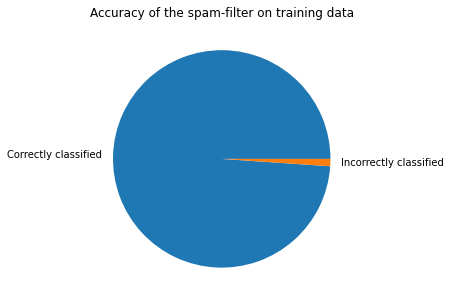

In [11]:
correct_cal = 0
incorrect_cal = 0

with open('sms.csv') as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    for lines in csvreader:
        complete_line = ''
        for line in lines:
            complete_line += line.lower()
        words = complete_line.split()
        decider = words[0]
        if decider == "spam":
            if IsSpam(complete_line[4:]) is True:
                correct_cal +=1
            else:
                incorrect_cal += 1
        else:
            if IsSpam(complete_line[8:]) is True:
                incorrect_cal +=1
            else:
                correct_cal += 1
            
accuracy = correct_cal / (incorrect_cal + correct_cal)
print("Number of correct classificaions: ", correct_cal)
print("Number of incorrect classificaions: ", incorrect_cal)
print("Accuracy spam-filter on the training data on which it is decided: ", accuracy)

# Creating plot
fig = plt.figure(figsize =(5, 5))
plt.pie([correct_cal, incorrect_cal], labels = ['Correctly classified', 'Incorrectly classified'])
plt.title("Accuracy of the spam-filter on training data")
plt.show()

(d) Test your classifier against 4-5 SMS messages (spam as well as non-spam) that you have received in your mobile phone.

In [31]:
message = input()
deciding_bool = IsSpam(message)

if deciding_bool is True:
    print("The message is spam")
else:
    print("The message is not spam")

hi
The message is not spam


In [23]:
messages = ["You won prize money", 
"Please call us back as soon as you got delivery",
"verify your account details",
"Dont judge a book by its cover", 
"Congratulations!! you got job worth 1 lakh per day", 
"How are you?",
"If you got prize money, please call us back now if you are free", 
"call call call call call call call"]

In [33]:
for msg in messages:
    print(msg)
    deciding_bool = IsSpam(msg)
    if deciding_bool is True:
        print("The message is spam")
    else:
        print("The message is not spam")
    print()

You won prize money
The message is spam

Please call us back as soon as you got delivery
The message is not spam

verify your account details
The message is spam

Dont judge a book by its cover
The message is not spam

Congratulations!! you got job worth 1 lakh per day
The message is not spam

How are you?
The message is not spam

If you got prize money, please call us back now if you are free
The message is spam

call call call call call call call
The message is spam



In [15]:
'''
Examples:
You won prize money
Please call us back as soon as you got delivery
verify your account details
Dont judge a book by its cover
Congratulations!! you got job worth 1 lakh per day
How are you?
'''

'\nExamples:\nYou won prize money\nPlease call us back as soon as you got delivery\nverify your account details\nDont judge a book by its cover\nCongratulations!! you got job worth 1 lakh per day\nHow are you?\n'